In [2]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

from pathlib import Path
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


MAIN_DIR = Path(os.getcwd()).resolve().parent.parent
CHAPTER_ID = "ch_02"
GRAPH_ROOT_DIR = Path.joinpath(MAIN_DIR, "data", "graphs", CHAPTER_ID)
os.makedirs(GRAPH_ROOT_DIR, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = Path.joinpath(GRAPH_ROOT_DIR, fig_id + "." + fig_extension)
    print("Saving Figure : ", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

DATASETS_DIR = Path.joinpath(MAIN_DIR, "data", "datasets")
HOUSING_DIR = Path.joinpath(DATASETS_DIR, "housing")
HOUSING_PATH = Path.joinpath(DATASETS_DIR, "housing", "housing.tgz")

def load_housing_data(housing_path=HOUSING_DIR):
    csv_path = Path.joinpath(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()

In [4]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [25]:
col = [c for c in housing.columns if housing[c].dtype != 'object']
num_housing = housing[col]

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

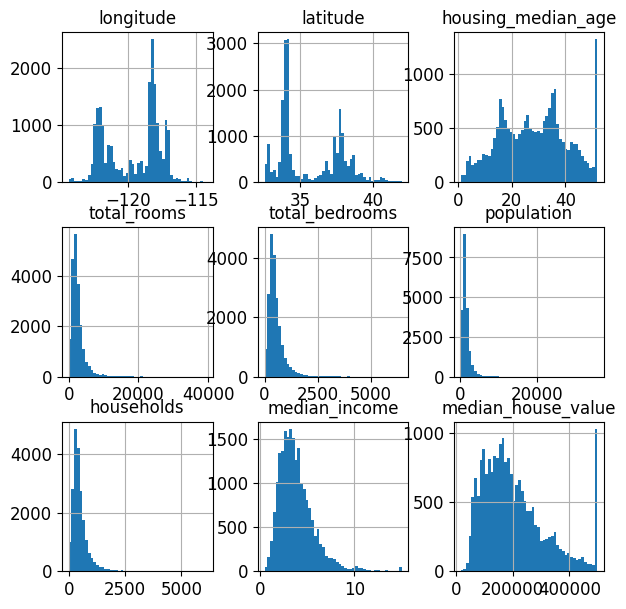

In [28]:
num_housing.hist(bins=50, figsize=(7, 7))

In [34]:
num_housing["longitude"] = abs(num_housing["longitude"])
log_housing = np.log(num_housing)

/var/folders/r1/lzjj2s794s7b78859vzpkpd40000gn/T/ipykernel_80641/138076897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_housing["longitude"] = abs(num_housing["longitude"])


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

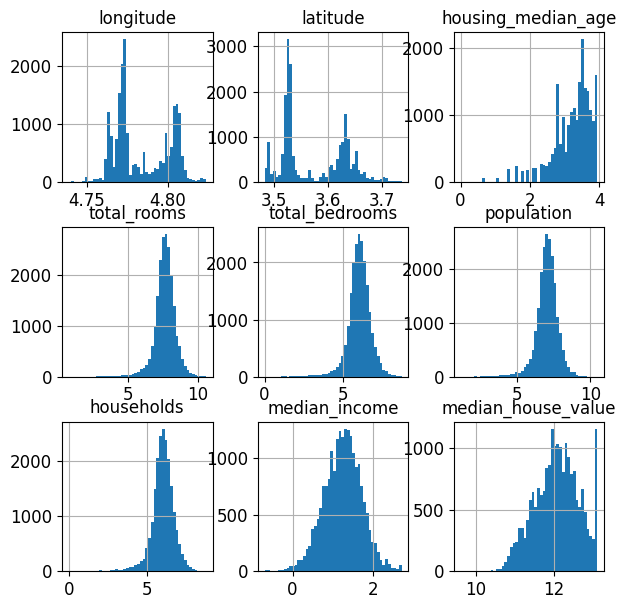

In [35]:
log_housing.hist(bins=50, figsize=(7, 7))

In [33]:
num_housing["longitude"] = abs(num_housing["longitude"])
num_housing
# log_housing["longitude"].head

/var/folders/r1/lzjj2s794s7b78859vzpkpd40000gn/T/ipykernel_80641/3532966651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_housing["longitude"] = abs(num_housing["longitude"])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0
